In [110]:
import pandas as pd

In [111]:
# target = "2024-04-07_18-15-53_brown-lot"
target = "2024-05-06_11-25-19_honeydew-tough"
results = pd.read_csv(f'results/target_{target}/transferability.csv')

In [112]:
# config_groups = [
#     "Surrogate_Data_V1",
#     "Surrogate_Data_V2",
#     "Surrogate_Data_V3",
#     "Surrogate_Data_V4",
#     "Surrogate_Data_V5",
# ]
config_groups = [
    "NoAdv_Surrogate_Data_V1",
    "NoAdv_Surrogate_Data_V2",
    "NoAdv_Surrogate_Data_V3",
    "NoAdv_Surrogate_Data_V4",
    "NoAdv_Surrogate_Data_V5",
]
config_groups_results = []
for config_group in config_groups:
    config_group_results = results[results["config"] == config_group]
    # filter out the results that have a total_samples_count of 400 (from extra tests)
    config_group_results = config_group_results[config_group_results["total_samples_count"] != 400]
    config_groups_results.append(config_group_results["samples_evaded_percentage"].tolist())
print(config_groups_results)
print([len(group) for group in config_groups_results])

[[0.5754527162977867, 0.7114093959731543, 0.6836027713625866, 0.6206896551724138, 0.7357512953367875, 0.8947368421052632], [0.7258426966292135, 0.8927335640138409, 0.7672413793103449, 0.7569620253164557, 0.792507204610951, 0.6301075268817204], [0.7672209026128266, 0.8582887700534759, 0.7949438202247191, 0.8274760383386581, 0.7308641975308642, 0.7976878612716763], [0.9262820512820512, 0.9206349206349206, 0.7859007832898173, 0.6991150442477876, 0.925531914893617, 0.84], [0.946927374301676, 0.9373219373219374, 0.9339080459770116, 0.952247191011236, 0.9497206703910616, 0.9071207430340558]]
[6, 6, 6, 6, 6]


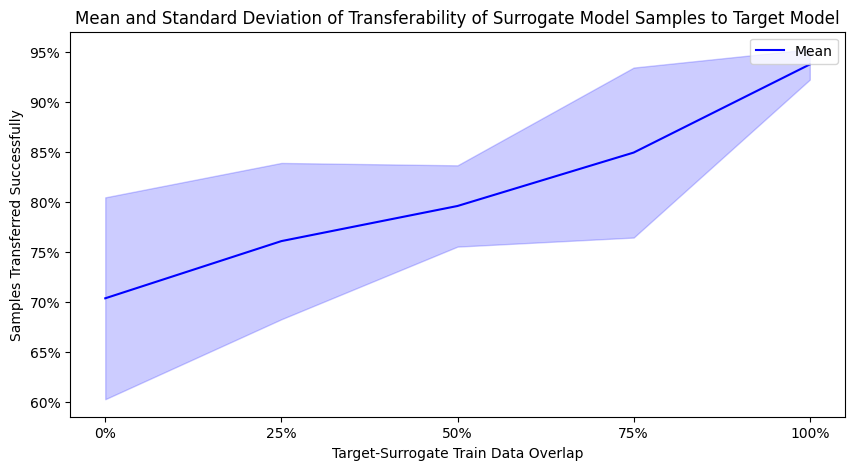

In [113]:
# plot the mean, std of the results with config groups on x-axis and samples_evaded_percentage on y-axis
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

data = np.array(config_groups_results)

means = [np.mean(group) for group in data]
std_devs = [np.std(group) for group in data]

groups = ["0%", "25%", "50%", "75%", "100%"]

plt.figure(figsize=(10, 5))
plt.plot(groups, means, label="Mean", color="blue")


plt.fill_between(
    groups,
    np.array(means) - np.array(std_devs),
    np.array(means) + np.array(std_devs),
    color="blue",
    alpha=0.2,
)

plt.xlabel("Target-Surrogate Train Data Overlap")
plt.ylabel("Samples Transferred Successfully")
plt.title("Mean and Standard Deviation of Transferability of Surrogate Model Samples to Target Model")
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()